# Supervised Learning - Project

In this Project, we are going to perform a full supervised learning machine learning project on a "Diabetes" dataset. This dataset is originally from the National Institute of Diabetes and Digestive and Kidney
Diseases. The objective of the dataset is to diagnostically predict whether a patient has diabetes,
based on certain diagnostic measurements included in the dataset. 

[Kaggle Dataset](https://www.kaggle.com/datasets/akshaydattatraykhare/diabetes-dataset)

# Part I : EDA - Exploratory Data Analysis

For this task, you are required to conduct an exploratory data analysis on the diabetes dataset. You have the freedom to choose the visualizations you want to use, but your analysis should cover the following tasks mostly:

- Are there any missing values in the dataset?
- How are the predictor variables related to the outcome variable?
- What is the correlation between the predictor variables?
- What is the distribution of each predictor variable?
- Are there any outliers in the predictor variables?
- How are the predictor variables related to each other?
- Is there any interaction effect between the predictor variables?
- What is the average age of the individuals in the dataset?
- What is the average glucose level for individuals with diabetes and without diabetes?
- What is the average BMI for individuals with diabetes and without diabetes?
- How does the distribution of the predictor variables differ for individuals with diabetes and without diabetes?
- Are there any differences in the predictor variables between males and females (if gender information is available)?

In [1]:
# importing packages 
import pandas as pd
import numpy as np

In [2]:
# importing csv data file 
data = pd.read_csv('diabetes.csv')

In [3]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
#checking null values
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
# checking duplicate values
data.duplicated().sum()

0

In [6]:
# checking data types
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [7]:
# checking stat for overall data
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [9]:
# checking zeros in each column
zero_counts = (data == 0).sum()
print(zero_counts)

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


#### As seen tere  are many zeros in the dataframe
#### lets remove zeros from Glucose, Bloodpressure and BMI columns for now as Skinthickness and Insulin has high amount of zeros

In [10]:
# defining the list of columns to remove zeros from 
columns_to_remove = ['Glucose', 'BloodPressure', 'BMI']

# Remove rows with zero values in the specified columns
cleaned_data = data.loc[~(data[columns_to_remove] == 0).any(axis=1)]


In [11]:
# checking number of zeros for each column
(cleaned_data == 0).sum()

Pregnancies                  99
Glucose                       0
BloodPressure                 0
SkinThickness               192
Insulin                     332
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     475
dtype: int64

#### Insulin and SkinThickness has high zero values so we will replace it with mean values of each respective feature

In [12]:
# calculating averge values for "SkinThickness" and "Insulin"
avg_skinthickness = cleaned_data['SkinThickness'].mean()
avg_insulin = cleaned_data['Insulin'].mean()

#replacing zeros with average values
cleaned_data.loc[cleaned_data['SkinThickness'] == 0, 'SkinThickness'] = avg_skinthickness
cleaned_data.loc[cleaned_data['Insulin'] == 0, 'Insulin'] = avg_insulin

In [13]:
cleaned_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35.00000,84.494475,33.6,0.627,50,1
1,1,85,66,29.00000,84.494475,26.6,0.351,31,0
2,8,183,64,21.44337,84.494475,23.3,0.672,32,1
3,1,89,66,23.00000,94.000000,28.1,0.167,21,0
4,0,137,40,35.00000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48.00000,180.000000,32.9,0.171,63,0
764,2,122,70,27.00000,84.494475,36.8,0.340,27,0
765,5,121,72,23.00000,112.000000,26.2,0.245,30,0
766,1,126,60,21.44337,84.494475,30.1,0.349,47,1


In [14]:
# checking stat for overall data after dealing with zeros in the data
cleaned_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,724.0,3.866022,3.362803,0.000,1.000000,3.000000,6.0000,17.00
Glucose,724.0,121.882597,30.750030,44.000,99.750000,117.000000,142.0000,199.00
BloodPressure,724.0,72.400552,12.379870,24.000,64.000000,72.000000,80.0000,122.00
SkinThickness,724.0,27.130010,9.645083,7.000,21.443370,24.000000,33.0000,99.00
Insulin,724.0,123.240560,94.398997,14.000,84.494475,84.494475,130.5000,846.00
BMI,724.0,32.467127,6.888941,18.200,27.500000,32.400000,36.6000,67.10
DiabetesPedigreeFunction,724.0,0.474765,0.332315,0.078,0.245000,0.379000,0.6275,2.42
Age,724.0,33.350829,11.765393,21.000,24.000000,29.000000,41.0000,81.00
Outcome,724.0,0.343923,0.475344,0.000,0.000000,0.000000,1.0000,1.00


<Axes: >

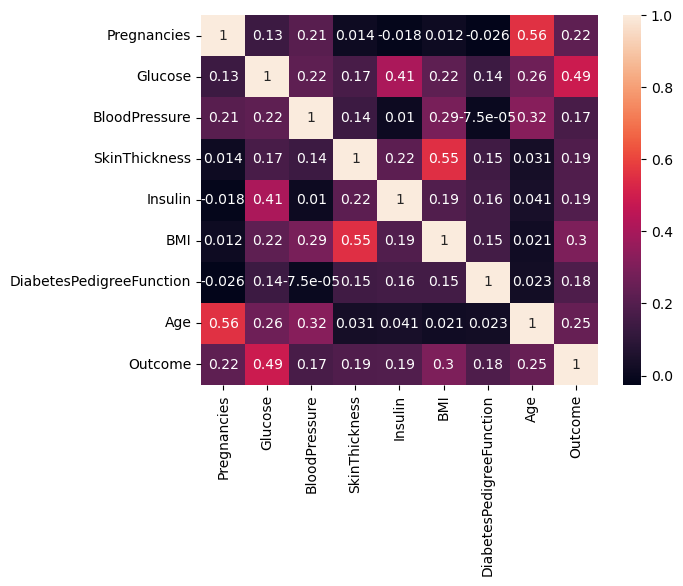

In [15]:
# checking correlation matrix between all columns
import seaborn as sns

correlation_matrix = cleaned_data.corr()

# creating heatmap for correlation matrix
sns.heatmap(correlation_matrix, annot=True)

#### As per heatmap Glucose is the only varialble that has highest correlation score with outcome
#### Now we will compare Glucose with Outcome

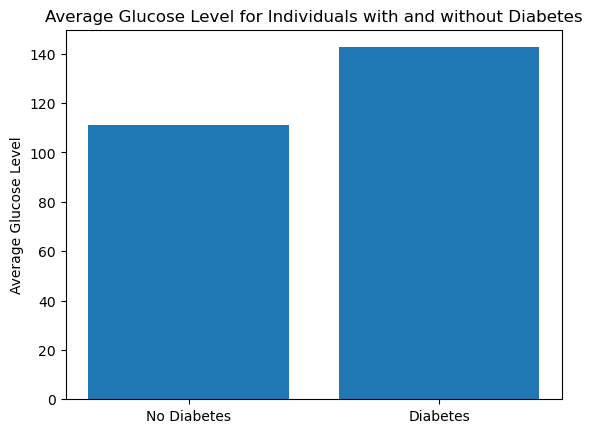

In [16]:
 import matplotlib.pyplot as plt
    
#for dataframe Cleaned_data Outcome has two values (1: diabetes, 0: no diabetes)

# calculating average glucose for people with diabetes
avg_glucose_with_diabetes = cleaned_data.loc[cleaned_data['Outcome'] == 1, 'Glucose'].mean()

# calculating averafe glucose for people with no diabetes
avg_glucose_with_no_diabetes = cleaned_data.loc[cleaned_data['Outcome'] == 0, 'Glucose'].mean()

# Create a bar chart
labels = ['No Diabetes', 'Diabetes']
averages = [avg_glucose_with_no_diabetes, avg_glucose_with_diabetes]

plt.bar(labels, averages)
plt.ylabel('Average Glucose Level')
plt.title('Average Glucose Level for Individuals with and without Diabetes')
plt.show()

In [17]:
avg_glucose_with_no_diabetes

111.01684210526315

## As seen in above Bar Chart that people with aprrox more than 111.016 of average glucose tend to have diabetes

--------------------------------------------------------------------------------------------

### Now we will check the How average BMI is related with Outcome

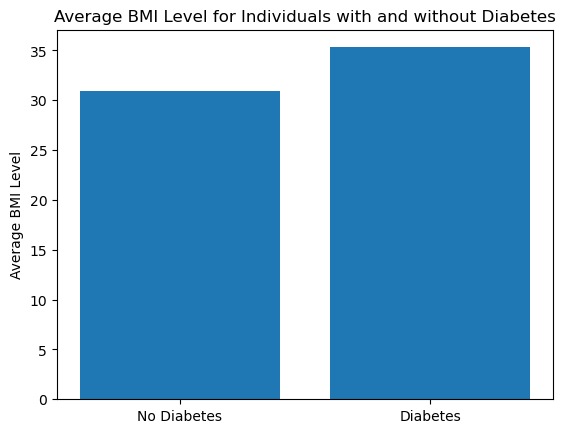

In [18]:
#for dataframe Cleaned_data Outcome has two values (1: diabetes, 0: no diabetes)

# calculating average BMI for people with diabetes
avg_bmi_diabetes = cleaned_data.loc[cleaned_data['Outcome'] == 1, 'BMI'].mean()

#calculating average BMI for people with no diabetes
avg_bmi_no_diabetes = cleaned_data.loc[cleaned_data['Outcome'] == 0, 'BMI'].mean()

# Create a bar chart
labels = ['No Diabetes', 'Diabetes']
averages = [avg_bmi_no_diabetes, avg_bmi_diabetes]

plt.bar(labels, averages)
plt.ylabel('Average BMI Level')
plt.title('Average BMI Level for Individuals with and without Diabetes')
plt.show()

In [19]:
avg_bmi_no_diabetes

30.974947368421056

## As seen in the Char people with more than 30.98 BMI tend to have diabetes

--------------------------------

## Check the Average age for people that have diabetes

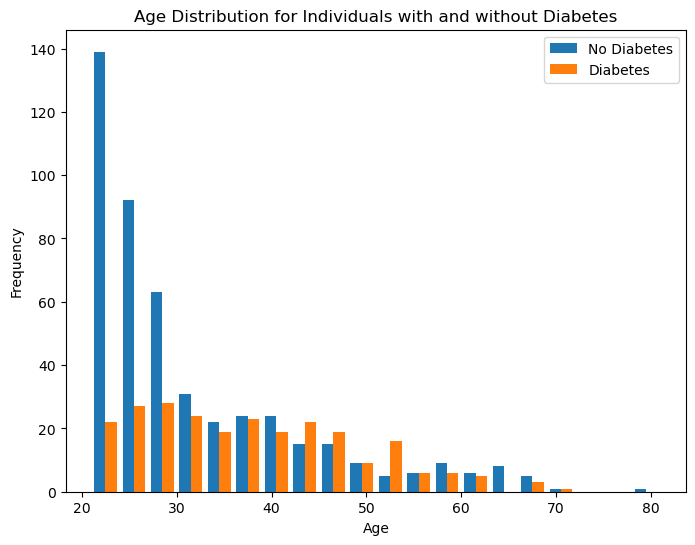

In [20]:
#for dataframe Cleaned_data Outcome has two values (1: diabetes, 0: no diabetes)

# calculating average BMI for people with diabetes
age_diabetes = cleaned_data.loc[cleaned_data['Outcome'] == 1, 'Age']

#calculating average BMI for people with no diabetes
age_no_diabetes = cleaned_data.loc[cleaned_data['Outcome'] == 0, 'Age']

# Create a bar chart

plt.figure(figsize=(8,6))
plt.hist([age_no_diabetes, age_diabetes], bins=20, label=['No Diabetes',  'Diabetes'])
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution for Individuals with and without Diabetes')
plt.legend()
plt.show()

### With the data we have:

The frequency of no diabetes is really high for the people in their 20s                          and low for diabetes.

with aging, the proportion of people with diabetes and no diabetes is almost similar and tend to be higher with diabetes after 40s. 
                         

------------------------------------------------------------------------------------------

### Checking distribution of each indipendent variable

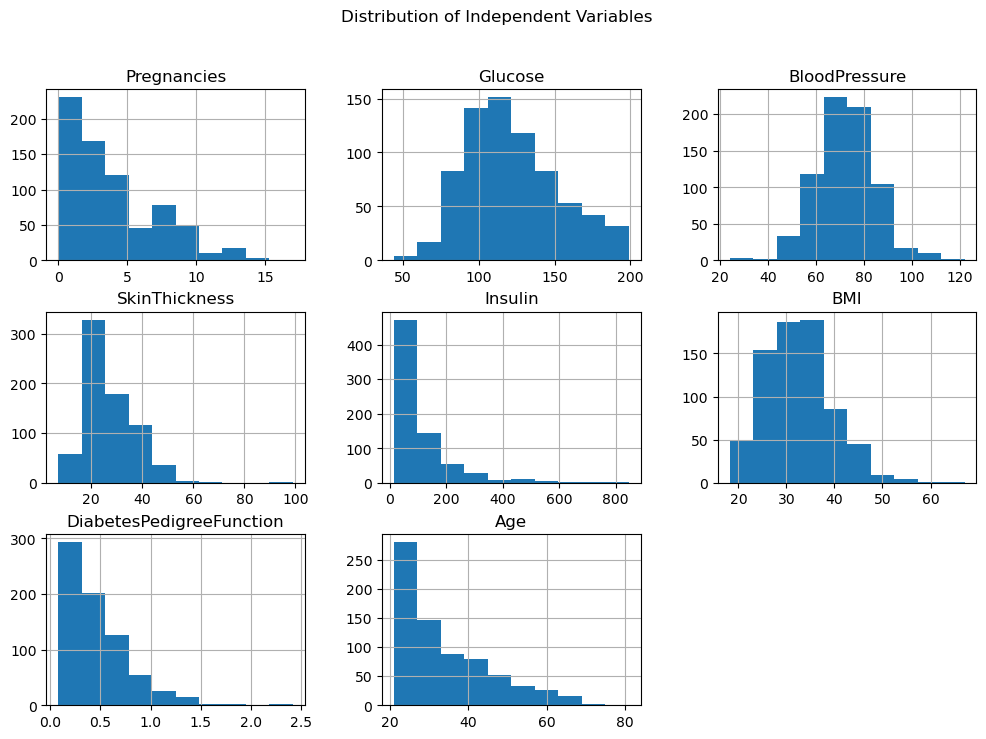

In [21]:
import matplotlib.pyplot as plt

# creating histogram for all the independent variables other then Outcome
cleaned_data.drop('Outcome', axis=1).hist(figsize=(12,8))

plt.suptitle('Distribution of Independent Variables')

plt.show()


------------------

## We will create a Logistic Regression model to check the correlation between the Target and Features

### Note: we are only taking feature that have more than 0.2 of correlation with Target variable from Corr Heatmap that we created

In [22]:
import statsmodels.api as sm

# Defining independent variable
X = cleaned_data.drop('Outcome', axis=1)

# adding constant for intercept 
X = sm.add_constant(X)

# defining independent variable
y = cleaned_data['Outcome']

# create and fit the logistic model
logit_model = sm.Logit(y, X)

result = logit_model.fit()

print(result.summary())



Optimization terminated successfully.
         Current function value: 0.463967
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                Outcome   No. Observations:                  724
Model:                          Logit   Df Residuals:                      715
Method:                           MLE   Df Model:                            8
Date:                Sat, 21 Oct 2023   Pseudo R-squ.:                  0.2791
Time:                        00:21:11   Log-Likelihood:                -335.91
converged:                       True   LL-Null:                       -465.97
Covariance Type:            nonrobust   LLR p-value:                 1.234e-51
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -9.0231      0.826    -10.929      0.000     -10.641

## Interpreting Model

### Feature with p-value of more than 0.05 are not significant with the Outcome, We will start the modelling with all the features and also compare the modle with taking most important features in consideration to compare the performance

In [23]:
# keeping significant feature with p value of more than 0.05
significant_features = cleaned_data.drop(['BloodPressure', 'SkinThickness', 'Insulin', 'Age'], axis=1)


In [24]:

# Defining independent variable
X = significant_features.drop('Outcome', axis=1)

# adding constant for intercept 
X = sm.add_constant(X)

# defining independent variable
y = significant_features['Outcome']

# create and fit the logistic model
logit_model = sm.Logit(y, X)

result = logit_model.fit()

print(result.summary())

Optimization terminated successfully.
         Current function value: 0.467008
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                Outcome   No. Observations:                  724
Model:                          Logit   Df Residuals:                      719
Method:                           MLE   Df Model:                            4
Date:                Sat, 21 Oct 2023   Pseudo R-squ.:                  0.2744
Time:                        00:21:11   Log-Likelihood:                -338.11
converged:                       True   LL-Null:                       -465.97
Covariance Type:            nonrobust   LLR p-value:                 3.832e-54
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -9.0000      0.717    -12.552      0.000     -10.405

### As seen these features are significant with the Target variable

-------------------------------------------------------------------------------------

# Part II : Preprocessing & Feature Engineering

You need to perform preprocessing on the given dataset. Please consider the following tasks and carry out the necessary steps accordingly.
- Handling missing values
- Handling outliers
- Scaling and normalization
- Feature Engineering
- Handling imbalanced data

# Feature selection

## Preprocessing the data for model with all the Features 

In [25]:
# creating X for all features and y as target

X = cleaned_data.drop(['Outcome'], axis=1)

y = cleaned_data['Outcome']

In [26]:
# split the data into training and testing test (test_train_split)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
# feature sclaing using standard scalar
from sklearn.preprocessing import StandardScaler

# create a standardscalar object
scaler = StandardScaler()

#transfrom the features for model building
X_train_scaled = scaler.fit_transform(X_train)

In [28]:
# scaling test data
X_test_scaled = scaler.transform(X_test)

In [29]:
y_train.value_counts(), y_test.value_counts()

(0    373
 1    206
 Name: Outcome, dtype: int64,
 0    102
 1     43
 Name: Outcome, dtype: int64)

## Selecting important features

In [30]:
# removing the features that have negative correlation with the Outcome
important_features = cleaned_data.drop(['BloodPressure', 'SkinThickness'],axis=1)

In [31]:
# creating X for features and y as target 

X1 = important_features.drop(['Outcome'], axis=1)

y1 = important_features['Outcome']

In [32]:
X1.shape, y1.shape

((724, 6), (724,))

In [33]:
# Splitting the data
from sklearn.model_selection import train_test_split

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.2, random_state=42)

In [34]:
X1_test

,Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age
346,1,139,83.000000,28.7,0.654,22
553,1,88,44.000000,29.9,0.422,23
590,11,111,84.494475,46.8,0.925,45
36,11,138,84.494475,33.2,0.420,35
399,3,193,84.494475,34.9,0.241,25
...,...,...,...,...,...,...
478,8,126,75.000000,25.9,0.162,39
351,4,137,84.494475,31.2,0.252,30
401,6,137,84.494475,24.2,0.151,55
458,10,148,237.000000,37.6,1.001,51


In [35]:
X1_train

,Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age
475,0,137,84.494475,27.3,0.231,59
6,3,78,88.000000,31.0,0.248,26
450,1,82,95.000000,21.2,0.415,23
635,13,104,84.494475,31.2,0.465,38
438,1,97,84.494475,18.2,0.147,21
...,...,...,...,...,...,...
77,5,95,84.494475,37.7,0.370,27
114,7,160,175.000000,30.5,0.588,39
286,5,155,545.000000,38.7,0.619,34
463,5,88,84.494475,27.6,0.258,37


In [36]:
# feature scaling using standard scalar
from sklearn.preprocessing import StandardScaler

# create a standardscalar object
scaler = StandardScaler()

#transfrom the features for model building
X1_train_scaled = scaler.fit_transform(X1_train)

In [37]:
# scaling test data
X1_test_scaled = scaler.transform(X1_test)

In [38]:
y1_train.value_counts(), y1_test.value_counts()

(0    373
 1    206
 Name: Outcome, dtype: int64,
 0    102
 1     43
 Name: Outcome, dtype: int64)

-------------------------------

# Part III : Training ML Model

For this task, you are required to build a machine learning model to predict the outcome variable. This will be a binary classification task, as the target variable is binary. You should select at least two models, one of which should be an ensemble model, and compare their performance.

- Train the models: Train the selected models on the training set.
- Model evaluation: Evaluate the trained models on the testing set using appropriate evaluation metrics, such as accuracy, precision, recall, F1-score, and ROC-AUC.
- Model comparison: Compare the performance of the selected models and choose the best-performing model based on the evaluation metrics. You can also perform additional analysis, such as model tuning and cross-validation, to improve the model's performance.

--------------------

### Logistic Regression Model with all features

In [39]:
from sklearn.linear_model import LogisticRegression

# create and train the logistic model
model = LogisticRegression()

#train the model on training data
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [40]:
# model evaluation 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# make the prediction on test set
y_pred = model.predict(X_test_scaled)

#Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

In [41]:
print("Accuracy:", accuracy)
print("Classification Report:\n", report)
print("Confusion Matrix:\n", confusion)

Accuracy: 0.8
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.87      0.86       102
           1       0.68      0.63      0.65        43

    accuracy                           0.80       145
   macro avg       0.76      0.75      0.76       145
weighted avg       0.80      0.80      0.80       145

Confusion Matrix:
 [[89 13]
 [16 27]]


-----------------------------

## Logistic Regression Model with Significant features

In [42]:
from sklearn.linear_model import LogisticRegression

# create and train the logistic model
model_significant = LogisticRegression()

#train the model on training data
model_significant.fit(X1_train_scaled, y1_train)

LogisticRegression()

In [43]:
# model evaluation 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# make the prediction on test set
y1_pred = model_significant.predict(X1_test_scaled)

#Evaluate the model
accuracy_imp = accuracy_score(y1_test, y1_pred)
report_imp = classification_report(y1_test, y1_pred)
confusion_imp = confusion_matrix(y1_test, y1_pred)

In [44]:
print("Accuracy:", accuracy_imp)
print("Classification Report:\n", report_imp)
print("Confusion Matrix:\n", confusion_imp)

Accuracy: 0.8
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.87      0.86       102
           1       0.68      0.63      0.65        43

    accuracy                           0.80       145
   macro avg       0.76      0.75      0.76       145
weighted avg       0.80      0.80      0.80       145

Confusion Matrix:
 [[89 13]
 [16 27]]


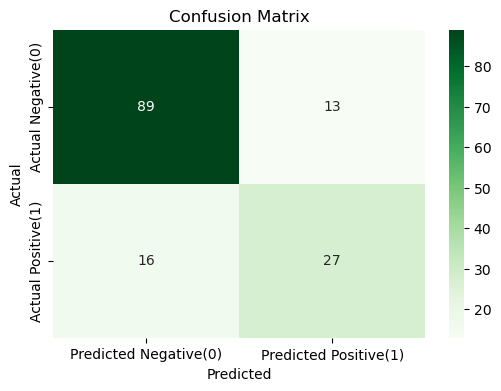

In [45]:
# Create a heatmap of the confusion matrix for visualization

# NOTE: We are taking "confusion" that is defined for all features
# models considering both the models have same result

plt.figure(figsize=(6, 4))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Greens', 
            xticklabels=['Predicted Negative(0)', 'Predicted Positive(1)'],
            yticklabels=['Actual Negative(0)', 'Actual Positive(1)'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Comparing the Logistic Models

In [46]:
print("Accuracy_all:", accuracy)
print("Classification Report_all:\n", report)
print("Confusion Matrix_all:\n", confusion)
print("-----------------------------------------------------")
print("Accuracy_imp:", accuracy_imp)
print("Classification Report_imp:\n", report_imp)
print("Confusion Matrix_imp:\n", confusion_imp)

Accuracy_all: 0.8
Classification Report_all:
               precision    recall  f1-score   support

           0       0.85      0.87      0.86       102
           1       0.68      0.63      0.65        43

    accuracy                           0.80       145
   macro avg       0.76      0.75      0.76       145
weighted avg       0.80      0.80      0.80       145

Confusion Matrix_all:
 [[89 13]
 [16 27]]
-----------------------------------------------------
Accuracy_imp: 0.8
Classification Report_imp:
               precision    recall  f1-score   support

           0       0.85      0.87      0.86       102
           1       0.68      0.63      0.65        43

    accuracy                           0.80       145
   macro avg       0.76      0.75      0.76       145
weighted avg       0.80      0.80      0.80       145

Confusion Matrix_imp:
 [[89 13]
 [16 27]]


# Interpreting model


## First interpreting confusion metrics

### Lets take a look at confusion metrics first as it will give an clear idea for all other Score that we will take 

### Actual Positive and negative are the actually values for the Outcome from our test data.

### Prediction values are the values that our model predicted 

#### (1) True Negative: The value model predicted has no diabetes(0) and it was correct : 89
#### (2) True Positive: The value model predicted has diabetes(1) and it was correct: 27
#### (3) False Negative: The value that model falsely precticed as no diabetes(0) but actually it was diabetes(1) : 16
#### (4) False Positive: The value that model falsely precited as diabetes(1) but actually it was no diabetes(0) : 13


### We are comparing the model performance when we considered  all features and only important features for logistic regression model

#### Accuracy score shows that model can predict 80 percent of the Test Samples correctly

#### Precision score is the fraction of predicted positive or negative events that are actually correct.

#####  For no diabetes it has 85 percent of presicion and for diabetes it is 68 percent.

#### Recall is the fraction of positive or negative events that we predicted correctly

##### for no diabetes it has 87 percent of Recall and 63 percent for diabetes

#### Confusion metrics is same for both the models


## Both the model have same predictions when taking all features and only the impotant ones

--------------------------------------

## Create XGBoost Model for all features

In [47]:
import xgboost as xgb

#create an xgboost classifier
model_xgb = xgb.XGBClassifier()

#train the model on training data
model_xgb.fit(X_train_scaled, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [48]:
# Make predictions on the test set
y_pred_xgb = model_xgb.predict(X_test_scaled)

# Evaluate the model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
report_xgb = classification_report(y_test, y_pred_xgb)
confusion_xgb = confusion_matrix(y_test, y_pred_xgb)

print("Accuracy_all:", accuracy_xgb)
print("Classification Report_all:\n", report_xgb)
print("Confusion Matrix_all:\n", confusion_xgb)

Accuracy_all: 0.7655172413793103
Classification Report_all:
               precision    recall  f1-score   support

           0       0.86      0.79      0.83       102
           1       0.59      0.70      0.64        43

    accuracy                           0.77       145
   macro avg       0.72      0.75      0.73       145
weighted avg       0.78      0.77      0.77       145

Confusion Matrix_all:
 [[81 21]
 [13 30]]


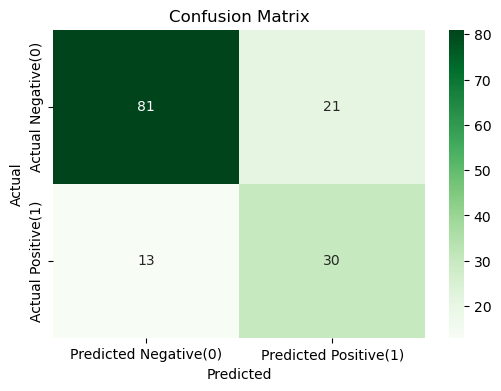

In [49]:
# Create a heatmap of the confusion matrix for visualization

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_xgb, annot=True, fmt='d', cmap='Greens', 
            xticklabels=['Predicted Negative(0)', 'Predicted Positive(1)'],
            yticklabels=['Actual Negative(0)', 'Actual Positive(1)'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#### (1) True Negative: The value model predicted has no diabetes(0) and it was correct : 81
#### (2) True Positive: The value model predicted has diabetes(1) and it was correct: 30
#### (3) False Negative: The value that model falsely precticed as no diabetes(0) but actually it was diabetes(1) : 13
#### (4) False Positive: The value that model falsely precited as diabetes(1) but actually it was no diabetes(0) : 21

#### Accuracy score shows that model can predict 78 percent of the Test Samples correctly

#### Precision score is the fraction of predicted positive or negative events that are actually correct.

#####  For no diabetes it has 86 percent of presicion and for diabetes it is 61 percent.

#### Recall is the fraction of positive or negative events that we predicted correctly

##### for no diabetes it has 79 percent of Recall and 70 percent for diabetes



---------------------------------------------------------------------------

## XGBoost on Important features

In [55]:
import xgboost as xgb

#create an xgboost classifier
model_xgb_imp = xgb.XGBClassifier()

#train the model on training data
model_xgb_imp.fit(X1_train_scaled, y1_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [56]:
# Make predictions on the test set
y1_pred_xgb_imp = model_xgb_imp.predict(X1_test_scaled)

# Evaluate the model
accuracy_imp_xgb = accuracy_score(y1_test, y1_pred_xgb_imp)
report_imp_xgb = classification_report(y1_test, y1_pred_xgb_imp)
confusion_imp_xgb = confusion_matrix(y1_test, y1_pred_xgb_imp)

print("Accuracy_imp:", accuracy_imp_xgb)
print("Classification Report_imp:\n", report_imp_xgb)
print("Confusion Matrix_imp:\n", confusion_imp_xgb)

Accuracy_imp: 0.7793103448275862
Classification Report_imp:
               precision    recall  f1-score   support

           0       0.86      0.81      0.84       102
           1       0.61      0.70      0.65        43

    accuracy                           0.78       145
   macro avg       0.74      0.76      0.75       145
weighted avg       0.79      0.78      0.78       145

Confusion Matrix_imp:
 [[83 19]
 [13 30]]


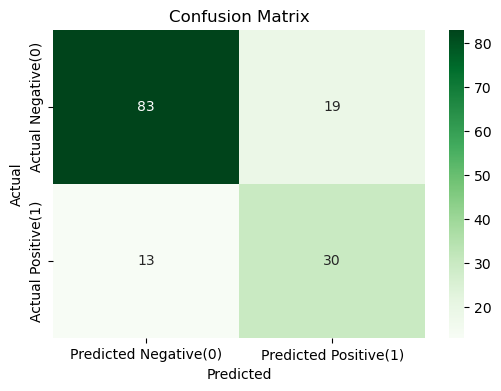

In [58]:
# Create a heatmap of the confusion matrix for visualization

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_imp_xgb, annot=True, fmt='d', cmap='Greens', 
            xticklabels=['Predicted Negative(0)', 'Predicted Positive(1)'],
            yticklabels=['Actual Negative(0)', 'Actual Positive(1)'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#### (1) True Negative: The value model predicted has no diabetes(0) and it was correct : 83
#### (2) True Positive: The value model predicted has diabetes(1) and it was correct: 30
#### (3) False Negative: The value that model falsely precticed as no diabetes(0) but actually it was diabetes(1) : 19
#### (4) False Positive: The value that model falsely precited as diabetes(1) but actually it was no diabetes(0) : 13

#### Accuracy score shows that model can predict 78 percent of the Test Samples correctly

#### Precision score is the fraction of predicted positive or negative events that are actually correct.

#####  For no diabetes it has 86 percent of presicion and for diabetes it is 61 percent.

#### Recall is the fraction of positive or negative events that we predicted correctly

##### for no diabetes it has 81 percent of Recall and 70 percent for diabetes


## Comparing XGBoost Models with all features and important features

In [60]:
print("Accuracy_all:", accuracy_xgb)
print("Classification Report_all:\n", report_xgb)
print("Confusion Matrix_all:\n", confusion_xgb)
print("---------------------------------------------------")
print("Accuracy_imp:", accuracy_imp_xgb)
print("Classification Report_imp:\n", report_imp_xgb)
print("Confusion Matrix_imp:\n", confusion_imp_xgb)

Accuracy_all: 0.7655172413793103
Classification Report_all:
               precision    recall  f1-score   support

           0       0.86      0.79      0.83       102
           1       0.59      0.70      0.64        43

    accuracy                           0.77       145
   macro avg       0.72      0.75      0.73       145
weighted avg       0.78      0.77      0.77       145

Confusion Matrix_all:
 [[81 21]
 [13 30]]
---------------------------------------------------
Accuracy_imp: 0.7793103448275862
Classification Report_imp:
               precision    recall  f1-score   support

           0       0.86      0.81      0.84       102
           1       0.61      0.70      0.65        43

    accuracy                           0.78       145
   macro avg       0.74      0.76      0.75       145
weighted avg       0.79      0.78      0.78       145

Confusion Matrix_imp:
 [[83 19]
 [13 30]]


### Looking at all the scores XGBoost with only Important Feature is better than the one with all features

---------------------------------

## Comparing the Logistic Regression and XGBoost model.

In [61]:
print("Accuracy_imp:", accuracy_imp)
print("Classification Report_imp:\n", report_imp)
print("Confusion Matrix_imp:\n", confusion_imp)
print("----------------------------------------------")
print("Accuracy_imp:", accuracy_imp_xgb)
print("Classification Report_imp:\n", report_imp_xgb)
print("Confusion Matrix_imp:\n", confusion_imp_xgb)

Accuracy_imp: 0.8
Classification Report_imp:
               precision    recall  f1-score   support

           0       0.85      0.87      0.86       102
           1       0.68      0.63      0.65        43

    accuracy                           0.80       145
   macro avg       0.76      0.75      0.76       145
weighted avg       0.80      0.80      0.80       145

Confusion Matrix_imp:
 [[89 13]
 [16 27]]
----------------------------------------------
Accuracy_imp: 0.7793103448275862
Classification Report_imp:
               precision    recall  f1-score   support

           0       0.86      0.81      0.84       102
           1       0.61      0.70      0.65        43

    accuracy                           0.78       145
   macro avg       0.74      0.76      0.75       145
weighted avg       0.79      0.78      0.78       145

Confusion Matrix_imp:
 [[83 19]
 [13 30]]


### As we can see Logistic Regression is performing better than XGBoost but we can't just ignore the XGBoost completely as it might be usefull as well

### The Model selection depends on the business needs

#### (1) Interpretability: Logistic Regression models are generally more interpretable than complex models like XGBoost. If model interpretability is a crucial requirement for our application, we might prefer Logistic Regression.

#### (2) Computational Resources: XGBoost is a more complex and resource-intensive model compared to Logistic Regression. we should consider available computational resources, especially if our plan to deploy the model in a resource-constrained environment.

#### (3) Scalability: XGBoost is  used for large datasets and complex problems. If our data for prodution is usually large and the problem is challenging, XGBoost might be a better choice for scalability and performance.

--------------------------------------

# Part IV : Conclusion

From the machine learning models developed and the exploratory data analysis (EDA) conducted, generate four bullet points as your findings.

(1) From our EDA and Modelling our sample has majority of Outcome that is with no diabetes.

(2) From the Stat Model for logistic regression: The features that were less significant with the traget variable were still contributing towards improvement of our model.

(3) Insulin and Skinthickness had almost half of the values as null, we replaced the zeros with the mean values of the features, if we had more complete for some variables results might have been better

(3) Logistics Regression Model gives out the same result as XGBoost model.